# Transcription factor comparison SCENIC+ and FigR

In [2]:
import pandas as pd

This document contains the transcription factor (TF) comparison between FigR and SCENIC+ human and mouse. Since SCENIC+ also uses another species, this will be also added in a newer version.

<mark>Uncertainties/questions are highlighted in this color</mark>

## FigR data

Data is freely accesible using this link:
https://github.com/buenrostrolab/FigR/tree/master/data

For both human and mouse, the `.rds` files are available containing the position frequency matrices (PFMs) of the TFs:

`.txt` files are generated in R using the following code:

```{r}
library(dplyr)
human_TFs <- readRDS('cisBP_human_pfms_2021.rds')
mouse_TFs <- readRDS('cisBP_mouse_pfms_2021.rds')

# Write TFs to file for comparison in Python
human_TFs_names <- toupper(names(human_TFs))
mouse_TFs_names <- toupper(names(mouse_TFs))
length(human_TFs_names)
length(mouse_TFs_names)
writeLines(unlist(lapply(human_TFs_names, paste, collapse="\n")), "motifs/FigR/human_TFs.txt", )
writeLines(unlist(lapply(mouse_TFs_names, paste, collapse="\n")), "motifs/FigR/mouse_TFs.txt", )
```

Human file: &nbsp;`human_TFs.txt` <br>
Mouse file: &nbsp;`mouse_TFs.txt`

<mark>There were also `.RData` files available, not sure if I needed to do anything with those files yet. </mark>

## SCENIC+ data

Motif data of SCENIC+ is collected for the following database: https://resources.aertslab.org/cistarget/motif2tf/

Files are in `.tbl` format.

Human motif file: &nbsp;`motifs-v10nr_clust-nr.hgnc-m0.001-o0.0.tbl` <br>
Mouse motif file: &nbsp;`motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl`

Next lists with TF's of are downloaded from the Github page: https://github.com/aertslab/scenicplus/tree/main/resources

Human TFs list: &nbsp;`allTFs_hg38.txt`<br>
Mouse TFs list: &nbsp;`allTFs_mm.txt` 

<mark>Should I also make a comparsison with the fruit fly data?</mark>

## Parsing the data

This section is based on the following notebook from pySCENIC: https://github.com/aertslab/pySCENIC/blob/master/notebooks/pySCENIC%20-%20List%20of%20Transcription%20Factors.ipynb

Below an example of how pySCENIC fetched the TFs using the motif files

In [3]:
import warnings; warnings.simplefilter('ignore')

# Loading human motifs file
motifs_human = pd.read_csv('motifs/scenic_plus/motifs-v10nr_clust-nr.hgnc-m0.001-o0.0.tbl', sep='\t')
# Get unique gene names
hs_tfs = motifs_human.gene_name.unique()
# Read TFs human
with open('motifs/scenic_plus/allTFs_hg38.txt', 'wt') as f:
    f.write('\n'.join(hs_tfs) + '\n')
print(len(hs_tfs))

1605


The currated list of human TFs from Lambert et al (PMID:29425488) is fetched from here: http://humantfs.ccbr.utoronto.ca/download.php

In [4]:
with open('motifs/scenic_plus/TF_names_v_1.01.txt', 'rt') as f:
    hs_curated_tfs = list(map(lambda s: s.strip(), f.readlines()))
len(hs_curated_tfs)

1639

Overlapping TFs with the Lambert et. al. TFs

In [5]:
hs_curated_tfs_overlap = list(set(hs_tfs).intersection(hs_curated_tfs))
len(hs_curated_tfs_overlap)

1428

## Comparsison overlap 

## Load TFs FigR and SCENIC+

In [6]:
mouse_tfs_FigR = pd.read_csv('motifs/FigR/mouse_TFs.txt', header=None)
mouse_tfs_FigR = [x.upper() for x in mouse_tfs_FigR[0].to_list()]

human_tfs_FigR = pd.read_csv('motifs/FigR/human_TFs.txt', header=None)
human_tfs_FigR = human_tfs_FigR[0].to_list()
mouse_tfs_scenic_plus = pd.read_csv('motifs/scenic_plus/allTFs_mm.txt', header=None)
mouse_tfs_scenic_plus = [x.upper() for x in mouse_tfs_scenic_plus[0].to_list()]

human_tfs_scenic_plus = pd.read_csv('motifs/scenic_plus/allTFs_hg38.txt', header=None)
human_tfs_scenic_plus = human_tfs_scenic_plus[0].to_list()

## Find overlapping TFs per species

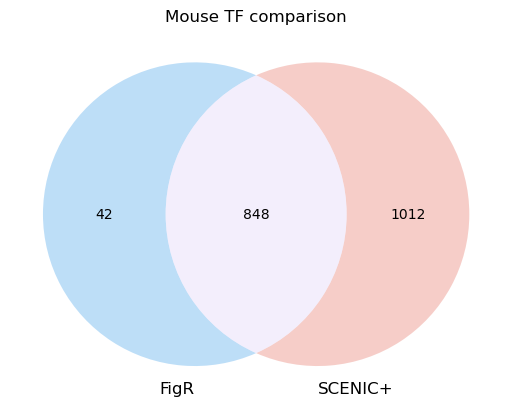

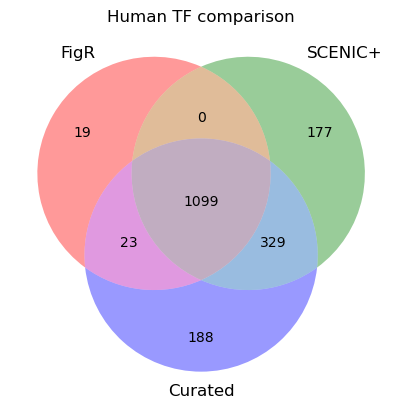

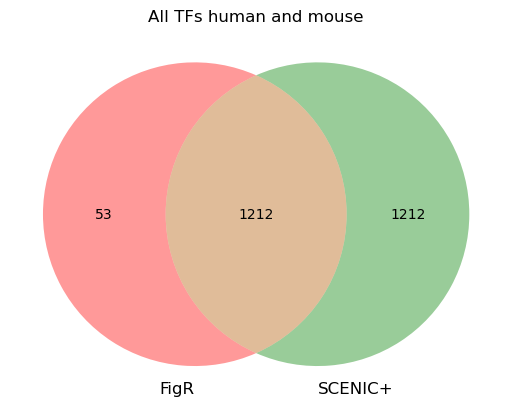

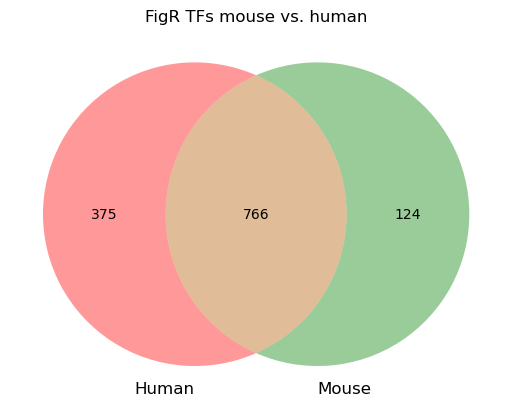

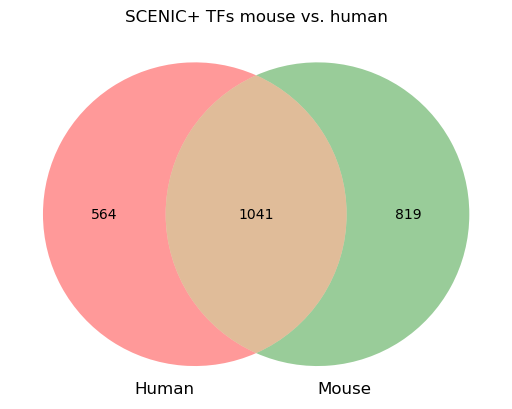

In [7]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted, venn3_unweighted

venn2_unweighted([set(mouse_tfs_FigR), set(mouse_tfs_scenic_plus)],
                 set_colors=("#5baded", "#e98477", "#eaf8f7"),
                 set_labels=("FigR", "SCENIC+"))
plt.title("Mouse TF comparison")
plt.show()
venn3_unweighted([set(human_tfs_FigR), set(human_tfs_scenic_plus), set(hs_curated_tfs)],
                 set_labels=("FigR", "SCENIC+", "Curated"))
plt.title("Human TF comparison")
plt.show()

venn2_unweighted([set(mouse_tfs_FigR + human_tfs_FigR), set(mouse_tfs_scenic_plus + human_tfs_scenic_plus)],
                 set_labels=("FigR", "SCENIC+"))
plt.title("All TFs human and mouse")
plt.show()

venn2_unweighted([set(human_tfs_FigR), set(mouse_tfs_FigR)],
                 set_labels=("Human", "Mouse"))
plt.title("FigR TFs mouse vs. human")
plt.show()

venn2_unweighted([set(human_tfs_scenic_plus), set(mouse_tfs_scenic_plus)],
                 set_labels=("Human", "Mouse"))
plt.title("SCENIC+ TFs mouse vs. human")
plt.show()

## To do/questions

- SCENIC(+) and FigR compare each other in both articles. Find identify differences there. 
- Find more information about motifs?
- Further analysis or continue for now?

## Motif comparison FigR and SCENIC+

Motifs are downloaded from cis-bp database. The paper mentions that the motifs with the highest binding score are selected for. Below we find the highest scoring motifs.

In [8]:
human_motifs_figr = pd.read_csv('motifs/FigR/TF_Information.txt', sep='\t')
print('Human unique TFs in motif database:',len(human_motifs_figr['TF_Name'].unique()))

human_motifs_figr = human_motifs_figr[human_motifs_figr['TF_Name'].isin(human_tfs_FigR)]
print('Human unique TFs base on TF list repo:', len(human_motifs_figr['TF_Name'].unique()))

mouse_motifs_figr = pd.read_csv('motifs/FigR/Mouse/TF_Information.txt', sep='\t')
print('\nMoues unique TFs in motif database:',len(mouse_motifs_figr['TF_Name'].unique()))

#mouse_motifs_figr = mouse_motifs_figr[mouse_motifs_figr['TF_Name'].isin(mouse_tfs_FigR)]
#print('Mouse unique TFs base on TF list repo:', len(mouse_motifs_figr['TF_Name'].unique()))
#mouse_motifs_figr

Human unique TFs in motif database: 1639
Human unique TFs base on TF list repo: 1123

Moues unique TFs in motif database: 1513


In [9]:
mouse_motifs_figr

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Year,PMID,MSource_Version,SR_Model,SR_NoThreshold,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T010906_2.00,F024_2.00,TS12_2.00,M00111_2.00,MS02_2.00,ENSMUSG00000021359,Tfap2a,Mus_musculus,D,AP-2,...,2009,19443739,NaN,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8
1,T010906_2.00,F024_2.00,TS12_2.00,M02768_2.00,MS33_2.00,ENSMUSG00000021359,Tfap2a,Mus_musculus,D,AP-2,...,2013,23332764,January 2013,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8
2,T010906_2.00,F024_2.00,TS12_2.00,M02769_2.00,MS33_2.00,ENSMUSG00000021359,Tfap2a,Mus_musculus,D,AP-2,...,2013,23332764,January 2013,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8
3,T010906_2.00,F024_2.00,TS12_2.00,M02770_2.00,MS33_2.00,ENSMUSG00000021359,Tfap2a,Mus_musculus,D,AP-2,...,2013,23332764,January 2013,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8
4,T010906_2.00,F024_2.00,TS12_2.00,M08704_2.00,MS27_2.00,ENSMUSG00000021359,Tfap2a,Mus_musculus,D,AP-2,...,2013,23175603,July 2014,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,T350319_2.00,F319_2.00,TS12_2.00,M09448_2.00,MS27_2.00,ENSMUSG00000031885,Cbfb,Mus_musculus,D,Unknown,...,2013,23175603,July 2014,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8
2074,T350320_2.00,F319_2.00,TS12_2.00,M09449_2.00,MS27_2.00,ENSMUSG00000032897,Nfyc,Mus_musculus,D,Unknown,...,2013,23175603,July 2014,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8
2075,T350321_2.00,F319_2.00,TS12_2.00,M02722_2.00,MS31_2.00,ENSMUSG00000046957,Spz1,Mus_musculus,D,Unknown,...,2014,24194598,August 2014,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8
2076,T350322_2.00,F319_2.00,TS12_2.00,M11440_2.00,MS59_2.00,ENSMUSG00000053111,Fank1,Mus_musculus,D,Unknown,...,2006,16381825,7.0,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8


In [10]:
human_motifs_scenic = pd.read_csv('motifs/scenic_plus/motifs-v10nr_clust-nr.hgnc-m0.001-o0.0.tbl', sep='\t')
mouse_motifs_scenic = pd.read_csv('motifs/scenic_plus/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl', sep='\t')

In [11]:
figr_motif_families = human_motifs_figr.Family_Name.unique()

In [12]:

scenic_plus_motif_families = human_motifs_scenic['description'].str.extract(r'family: (.*?)DBDs').dropna()[0].tolist()

In [13]:
scenic_plus_motif_families = [i.strip(' ') for i in scenic_plus_motif_families]

In [14]:
figr_motif_families = set(figr_motif_families)
scenic_plus_motif_families = set(scenic_plus_motif_families)

overlap_fam = figr_motif_families.intersection(scenic_plus_motif_families)


In [15]:
print(figr_motif_families)
print(scenic_plus_motif_families)


{'CUT,Homeodomain', 'Myb/SANT', 'Pipsqueak', 'TBP', 'CCCH ZF', 'GATA', 'Paired box', 'bZIP', 'bHLH', 'Homeodomain', 'HSF', 'C2HC ZF', 'CxxC', 'Ndt80/PhoG', 'Nuclear receptor', 'Prospero', 'CSL', 'MADF', 'DM', 'Brinker', 'Unknown', 'GCM', 'bHLH,T-box', 'THAP finger', 'SMAD', 'BED ZF', 'IRF', 'T-box', 'TEA', 'p53', 'AP-2', 'AT hook', 'ARID/BRIGHT', 'EBF1', 'RFX', 'Forkhead', 'MBD', 'C2H2 ZF', 'Homeodomain,Paired box', 'SAND', 'CENPB', 'Ets', 'STAT', 'C2H2 ZF,MADF', 'CSD', 'C2H2 ZF,Homeodomain', 'Homeodomain,POU', 'Sox', 'E2F', 'Runt', 'TCR/CxC', 'Grainyhead', 'CBF/NF-Y', 'MADS box', 'Rel', 'bZIP,C2H2 ZF'}
{'CUT,Homeodomain', 'Myb/SANT', 'POU', 'Pipsqueak', 'TBP', 'GATA', 'Paired box', 'bZIP', 'bHLH', 'Homeodomain', 'HSF', 'CxxC', 'Nuclear receptor', 'DM', 'Unknown', 'GCM', 'THAP finger', 'SMAD', 'IRF', 'T-box', 'p53', 'AP-2', 'AT hook', 'ARID/BRIGHT', 'RFX', 'SAND', 'Forkhead', 'STAT', 'Homeodomain,Paired box', 'C2H2 ZF', 'Ets', 'CENPB', 'Homeodomain,POU', 'Sox', 'C2H2 ZF,Homeodomain', '

['AP-2', 'ARID/BRIGHT', 'AT hook', 'C2H2 ZF', 'C2H2 ZF,Homeodomain', 'CENPB', 'CUT,Homeodomain', 'CxxC', 'DM', 'E2F', 'Ets', 'Forkhead', 'GATA', 'GCM', 'Grainyhead', 'HSF', 'Homeodomain', 'Homeodomain,POU', 'Homeodomain,Paired box', 'IRF', 'MADS box', 'Myb/SANT', 'Nuclear receptor', 'Paired box', 'Pipsqueak', 'RFX', 'Rel', 'SAND', 'SMAD', 'STAT', 'Sox', 'T-box', 'TBP', 'THAP finger', 'Unknown', 'bHLH', 'bZIP', 'p53']


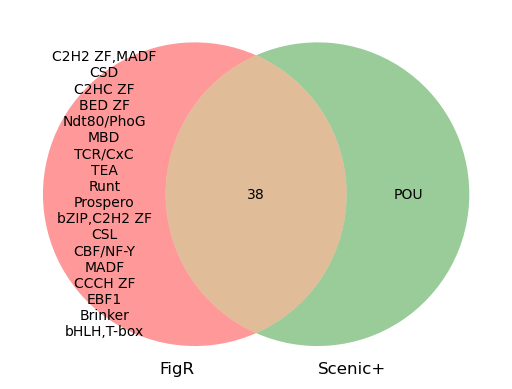

In [16]:
venn = venn2_unweighted([figr_motif_families, scenic_plus_motif_families], ('FigR', 'Scenic+'))

venn.get_label_by_id('100').set_text('\n'.join(figr_motif_families-scenic_plus_motif_families))
venn.get_label_by_id('010').set_text('\n'.join(scenic_plus_motif_families-figr_motif_families))
print(sorted(overlap_fam))
plt.show()


In [ ]:
sorted

## Evidence TF collection 

For SCENIC+ motifs, 1553, 1357 and 467 TFs are collected with direct evidence for human, mouse and fly respectively.

In [17]:
human_motifs_figr.groupby('TF_Status').count()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,Family_Name,DBDs,...,MSource_Year,PMID,MSource_Version,SR_Model,SR_NoThreshold,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
TF_Status,,,,,,,,,,,,,,,,,,,,,
D,5185,5185,5185,5185,5185,5185,5185,5185,5185,5185,...,5185,5170,4860,5185,5185,5185,5185,5185,5185,5185
I,89,89,89,89,89,89,89,89,89,89,...,89,82,35,89,89,89,89,89,89,89


In [18]:
mouse_motifs_figr.groupby('TF_Status').count()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,Family_Name,DBDs,...,MSource_Year,PMID,MSource_Version,SR_Model,SR_NoThreshold,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
TF_Status,,,,,,,,,,,,,,,,,,,,,
D,1213,1213,1213,1213,1213,1213,1213,1213,1213,1213,...,1213,1210,706,1213,1213,1213,1213,1213,1213,1213
I,290,290,290,290,290,290,290,290,290,290,...,290,276,213,290,290,290,290,290,290,290
N,575,575,575,575,575,575,575,575,575,575,...,575,575,575,575,575,575,575,575,575,575
